# 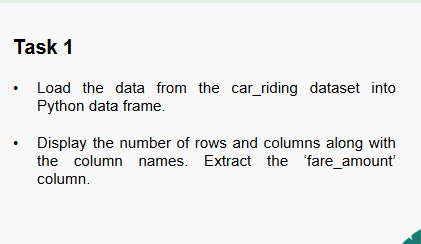

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
car_riding=pd.read_csv('Downloads/DS1_C8_S2_SmartCarRiding_Data_Practice.csv')
car_riding.head()#fare_amount	


,Index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
# number of rows and columns 
car_riding.shape

(200000, 9)

In [7]:
# column names
car_riding.columns

Index(['Index', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [8]:
car_riding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [9]:
# extracting fare amt column
fa=car_riding['fare_amount']
fa

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 200000, dtype: float64

# 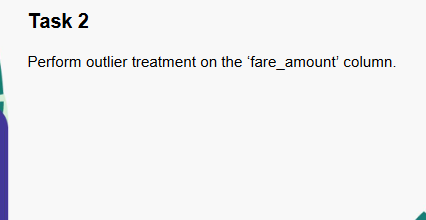

In [11]:
fa.size

200000

In [12]:
import statistics as st

In [13]:
# iqr method
q1=fa.quantile(0.25)
q3 =fa.quantile(0.75)
iqr=q3-q1
uf=q3+1.5*iqr
lf=q1-1.5*iqr


In [14]:
fa[(fa<lf)|(fa>uf)].size# outlier size

17167

In [15]:
200000-17167#original size-outlier df size

182833

In [16]:
fa.median()

8.5

In [17]:
fa[(fa<lf)|(fa>uf)]=fa.median()

C:\Users\asher\AppData\Local\Temp\ipykernel_20736\706481950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa[(fa<lf)|(fa>uf)]=fa.median()


In [18]:
fa[(fa<lf)|(fa>uf)] # outliers replaced by median value

Series([], Name: fare_amount, dtype: float64)

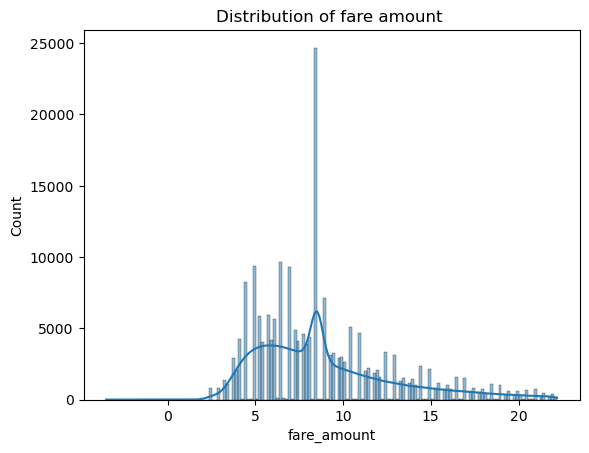

In [19]:
plt.title('Distribution of fare amount ')
sns.histplot(x=fa,kde=True)
plt.show()

# oulier analysis done on fare_amount

# 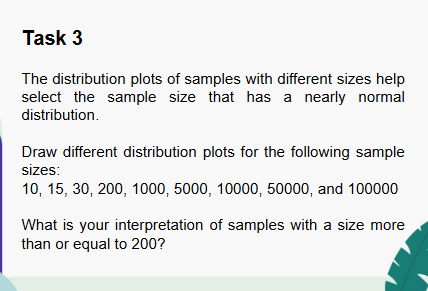

In [22]:
import warnings
warnings.filterwarnings('ignore')

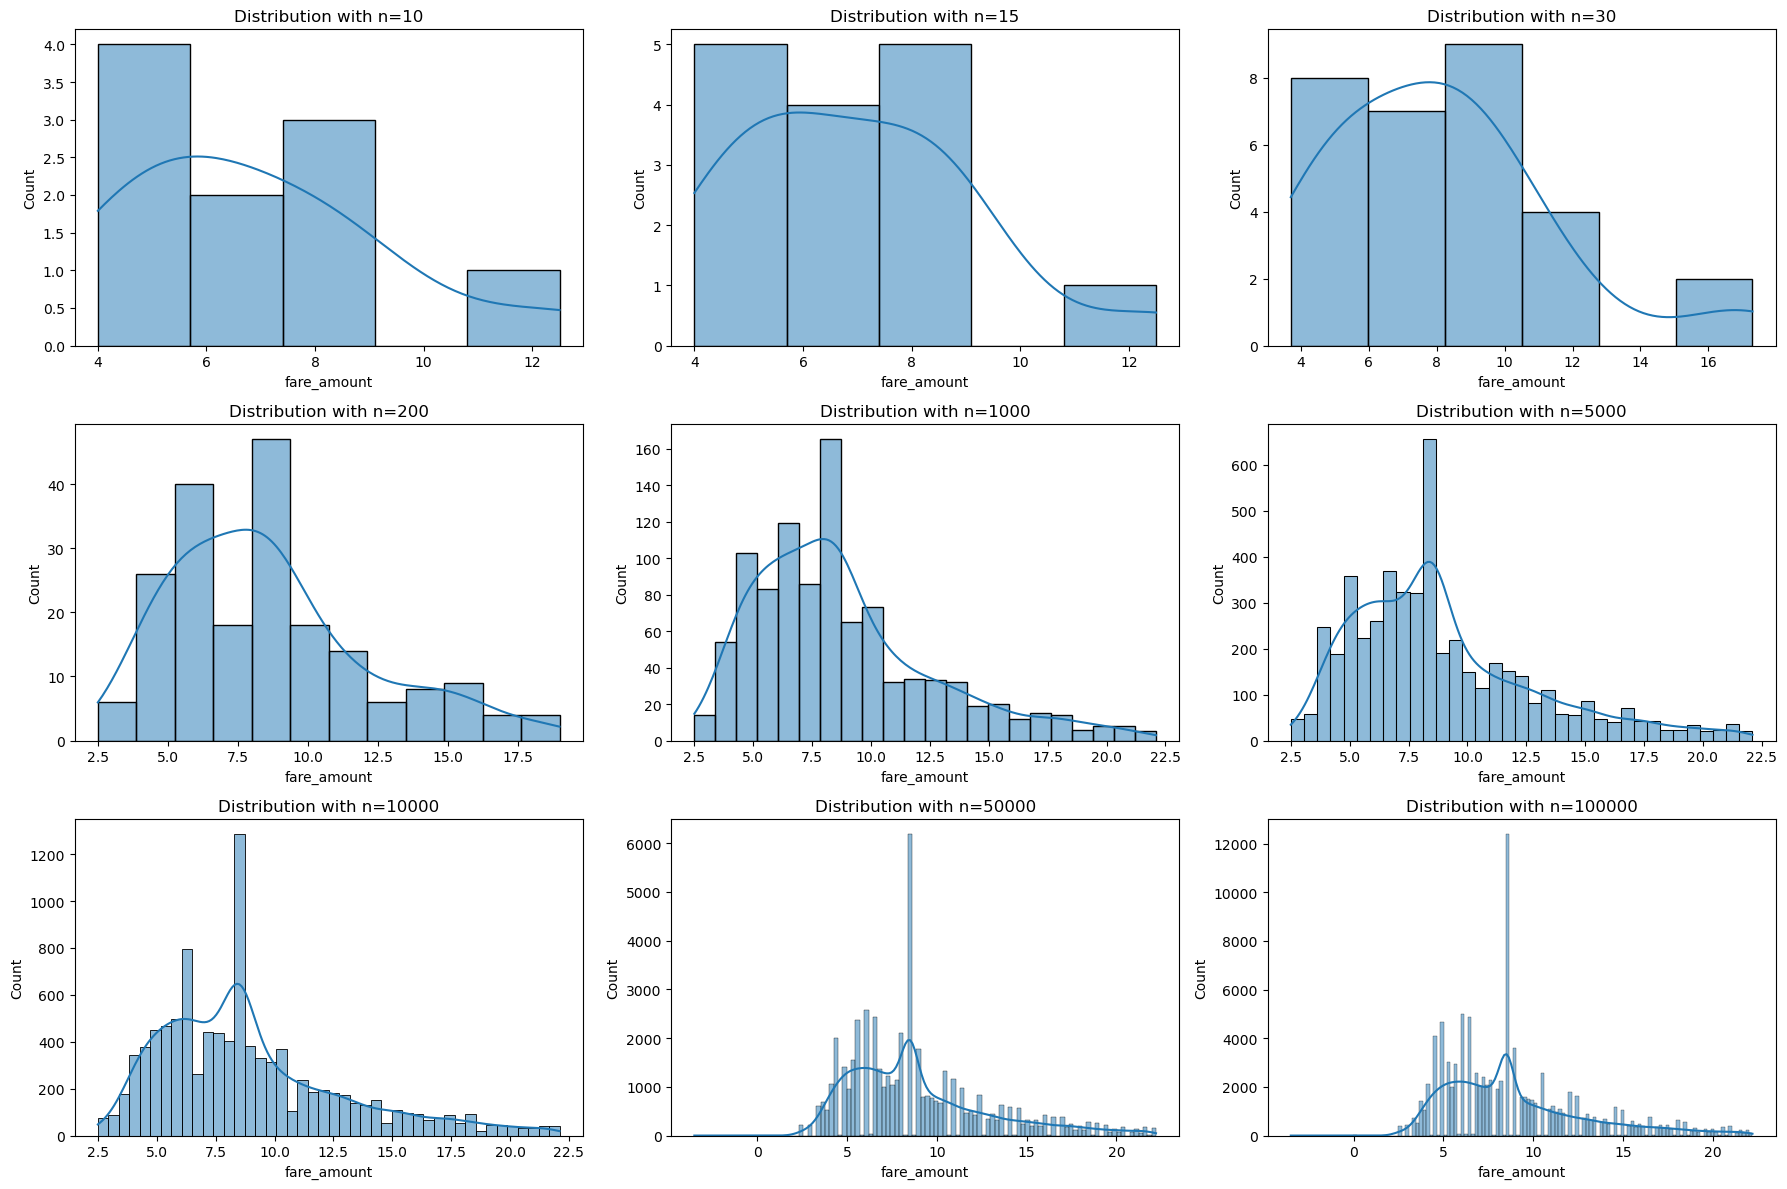

In [23]:
n_values=[10,15,30,200,1000,5000,10000,50000,100000]
fig,axes=plt.subplots(3,3,figsize=(18,12))
for ax ,n in zip(axes.flatten(),n_values):
    sample=fa.sample(n=n,random_state=1)
    sns.histplot(sample,kde=True,ax=ax)
    ax.set_title(f'Distribution with n={n}')
plt.tight_layout()
plt.show()

# present in one frame

# we can see the more the sample sizes increase  the more it is toward the curve of the normal distribution .

# 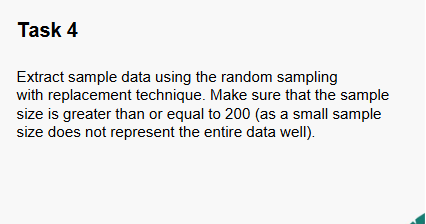

# 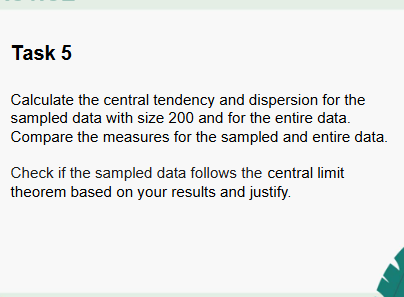

In [94]:
sample_data_10 = fa.sample(10, random_state = 1, replace = True)
sample_data_15 = fa.sample(15, random_state = 1, replace = True)
sample_data_30 = fa.sample(30, random_state = 1, replace = True)
sample_data_200 = fa.sample(200, random_state = 1, replace = True)
sample_data_1000 = fa.sample(1000, random_state = 1, replace = True)
sample_data_5000 = fa.sample(5000, random_state = 1, replace = True)
sample_data_10000 = fa.sample(10000, random_state = 1, replace = True)
sample_data_50000 = fa.sample(50000, random_state = 1, replace = True)
sample_data_100000 = fa.sample(100000, random_state = 1, replace = True)

In [28]:
#sample_size_200=fa.sample(n=200,random_state=1,replace=True)

# fa,sample_df

# central tendency and dispersion for population

In [98]:
import scipy.stats as sts

In [100]:
mean_p=fa.mean()
median_p=fa.median()
#mode_p=fa.mode()
std_p=fa.std()
print('The mean of the population:',mean_p)
print('The median of the population:',median_p)
#print('The mode of the population:',mode_p)
print('The standard deviation of the population:',std_p)
print(f'skewness  of the population:{sts.skew(fa.tolist(),bias=False)}')
print(f'kurosis  of the population:{sts.kurtosis(fa.tolist(),bias=False)}')


The mean of the population: 8.902319600000002
The median of the population: 8.5
The standard deviation of the population: 3.9633736896889458
skewness  of the population:1.069346160582149
kurosis  of the population:0.8285942645415538


# central tendency and dispersion for  sample

In [149]:
mean_s=sample_data_200.mean()
median_s=sample_data_200.median()
#mode_p=fa.mode()
std_s=sample_data_200.std()
print('The mean of the sample:',mean_s)
print('The median of the sample:',median_s)
#print('The mode of the population:',mode_p)
print('The standard deviation of the sample:',std_s)
print(f'skewness  of the sample:{sts.skew(sample_data_200.tolist(),bias=False)}')
print(f'kurosis  of the sample:{sts.kurtosis(sample_data_200.tolist(),bias=False)}')

The mean of the sample: 8.934149999999999
The median of the sample: 8.5
The standard deviation of the sample: 3.971918802337458
skewness  of the sample:1.178544184102183
kurosis  of the sample:1.2198341750953192


In [119]:
sample = pd.DataFrame()
for i in range(0,20):
    sample_data = fa.sample(200, random_state = i, replace = True).reset_index(drop = True)
    sample["sample "+str(i)] = sample_data

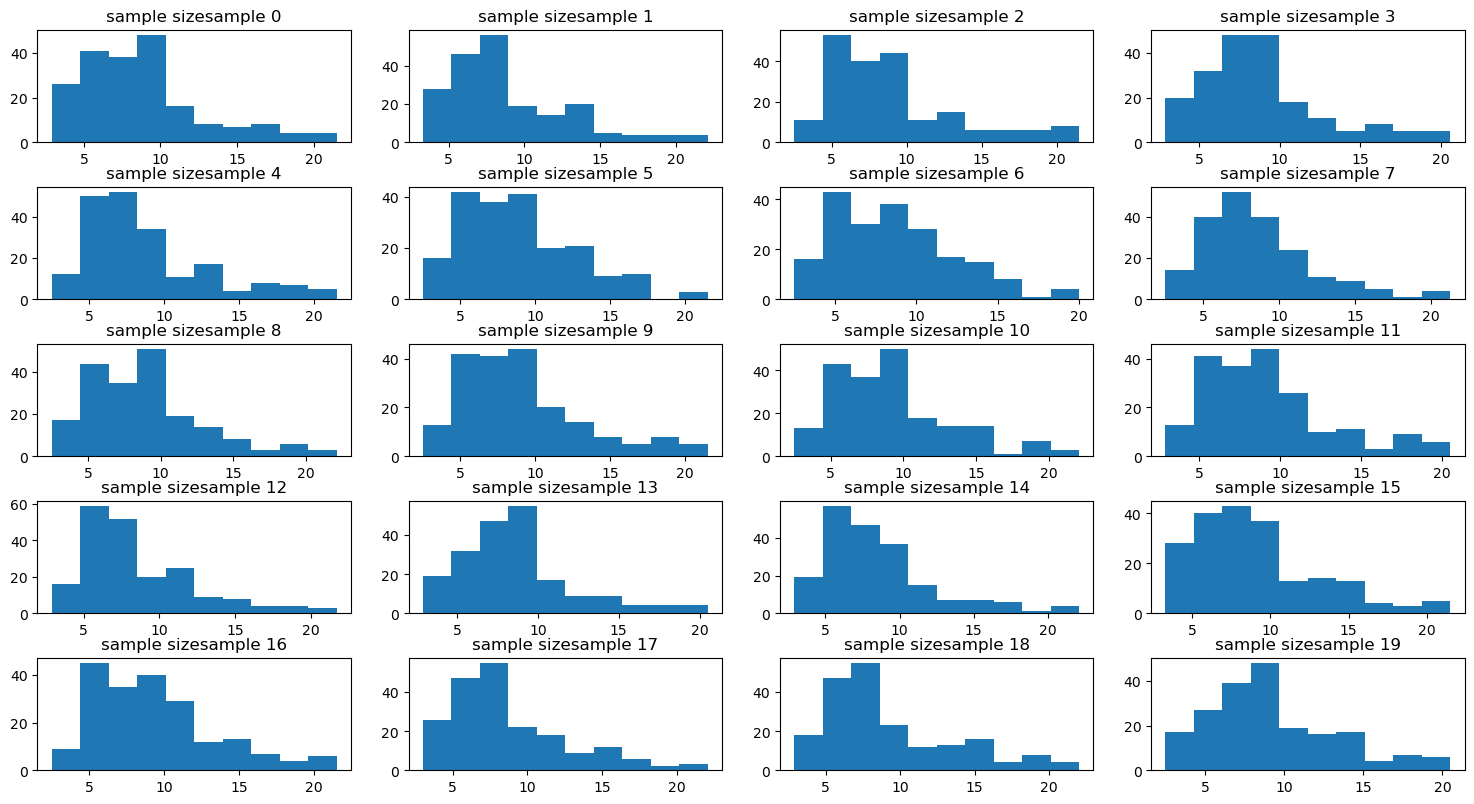

In [123]:
import numpy
import matplotlib.pyplot as plt
sample_name=sample.columns
fig,ax=plt.subplots(5,4,figsize=(15,8))
fig.tight_layout()
k=0
for i in range(0,5):
    for j in range(0,4):
        ax[i,j].hist(sample[sample_name[k]])
        ax[i,j].set_title(label='sample size'+sample_name[k])
        k=k+1
plt.show()

# calculating mean of all 20 samples

In [129]:
mean=[]
for i in sample:
    mean.append(sample[i].mean())

mean_sample = {"samplename":sample.columns, "mean":mean}
samples_mean=pd.DataFrame(mean_sample)
samples_mean

,samplename,mean
0,sample 0,8.71350
1,sample 1,8.93415
2,sample 2,8.93900
3,sample 3,8.73865
4,sample 4,8.78650
5,sample 5,8.88365
6,sample 6,8.57950
7,sample 7,8.47525
8,sample 8,8.77050
9,sample 9,8.99800


In [135]:
std_sample = samples_mean["mean"].std()
print('the standard deviation of all 20 samples mean is ',std_sample)

the standard deviation of all 20 samples mean is  0.25140753059681675


In [137]:
sample_df

,Sample_0,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,...,Sample_30,Sample_31,Sample_32,Sample_33,Sample_34,Sample_35,Sample_36,Sample_37,Sample_38,Sample_39
0,9.0,16.5,6.1,8.5,5.3,8.5,12.1,8.5,8.5,4.1,...,8.1,9.0,12.1,8.5,3.7,18.0,9.7,20.0,7.7,8.5
1,8.5,7.3,21.0,14.1,7.3,9.3,20.0,5.0,7.7,22.0,...,4.5,11.0,8.5,6.5,13.5,5.0,4.9,9.0,5.3,15.5
2,9.5,6.5,6.5,5.7,8.5,8.5,4.1,13.7,6.5,5.3,...,5.0,8.5,4.9,5.7,4.5,8.5,7.7,8.0,6.1,6.1
3,10.1,16.0,9.5,6.1,7.5,5.7,6.0,12.9,8.5,5.0,...,10.1,14.0,8.5,5.3,9.0,6.9,4.9,13.5,14.9,8.0
4,10.9,4.5,5.7,5.5,8.0,18.5,8.1,11.5,7.7,12.5,...,10.5,8.5,8.5,3.7,6.1,6.9,8.5,8.0,9.3,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,6.5,5.3,7.0,8.1,3.7,11.3,7.0,4.5,14.1,4.1,...,5.5,8.5,11.5,5.0,4.9,5.3,8.1,7.0,7.3,4.9
196,10.1,11.3,9.0,8.1,19.0,8.5,10.0,6.5,7.0,7.0,...,7.3,7.7,4.9,3.3,5.0,14.5,6.0,4.5,4.5,11.7
197,14.1,14.0,6.1,4.5,6.0,7.3,6.5,14.0,5.3,5.5,...,5.5,8.5,18.9,4.9,11.3,8.5,7.3,19.5,12.9,4.9
198,12.0,5.3,7.3,6.9,15.0,8.9,18.5,6.1,5.3,6.0,...,6.5,12.1,4.0,10.9,11.0,11.5,6.1,4.1,8.5,11.3


In [139]:
import math
sample_std=sample_mean_std/math.sqrt(20)
print('the standard deviation of population parameter  is ',sample_std)

the standard deviation of population parameter  is  0.06091465122525308


# population curve

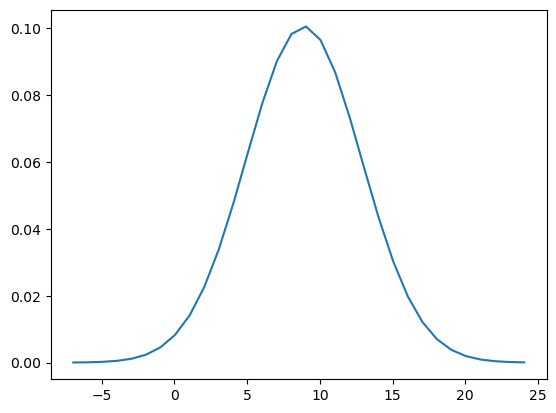

In [44]:
from scipy.stats import norm
lower_p=mean_p-4*std_p
upper_p=mean_p+4*std_p
norm_p=np.arange(lower_p,upper_p)
plt.plot(norm_p,norm.pdf(norm_p,mean_p,std_p))
plt.show()

# sample curve

In [47]:
#s_mean=sample_df['Sample_39'].mean()
#s_std=sample_df['Sample_39'].std()

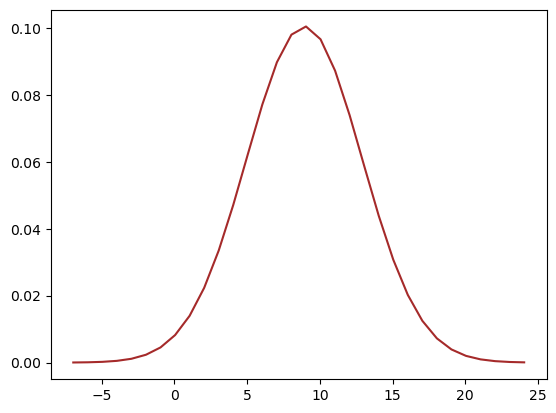

In [147]:
from scipy.stats import norm
lower_s=mean_s-4*std_s
upper_s=mean_s+4*std_s
norm_s=np.arange(lower_s,upper_s)
plt.plot(norm_s,norm.pdf(norm_s,mean_s,std_s),color='brown')
plt.show()

# # the mean is nearly equal.the median is exactly equal 8.5 and the sample and population has nearly equal standard deviation with sample having a bit edge .it is right skew>1 and the kurtosis is leptokurtic>0 .
